In [1]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [2]:
file_path1 = "./data/shortjokes.csv"
file_path2 = "./data/crowdtruth_humorous_oneliners.pickle"

In [93]:
#file_path1 = dp.download_data('https://github.com/amoudgl/short-jokes-dataset/raw/master/shortjokes.csv')

In [3]:
jokes1 = dp.load_data(file_path1, header=True, sep=',')
jokes1 = list(jokes1['Joke'].values)
with open(file_path2, 'rb') as pickleFile:
    jokes2 = pickle.load(pickleFile)
jokes = jokes1
jokes.extend(jokes2)
jokes = list(set(jokes))
print(len(jokes))
print(jokes[:10])

236188
['Facebook is not all about likes and shares. . . Like and share if you agree.', "Did you hear about the new corduroy pillows? They're making headlines everywhere!!", "What's Forrest Gump's password? 1forrest1.", 'What was the old lady\'s favourite type of wine? "Why don\'t you ever take me to Florida?" Courtesy of my Nana.', "Guy walks into a psychiatrist's office wearing only Saran Wrap... Guy: doctor, I've been hearing voices. Can you help? Doctor: I'll try to diagnose but I can clearly see your nuts", 'A toast to wives, girlfriends, and lovers. May they never meet.', 'If meat is murder... ...then is cake battery?', "I doubt vodka has all the answers But it's worth a shot.", "Why was the mushroom invited to the party? Because he's a fungi.", "Doctor Doctor I'm a burglar! Have you taken anything for it?"]


In [4]:
unique_chars = dp.get_unique_chars(jokes)
print(len(unique_chars))
print(unique_chars)

97
['\x08', '\x10', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [5]:
dp.get_char_presence(jokes)

Number of sentences containing each char is,
{'\x08': 1, '\x10': 1, ' ': 236156, '!': 27624, '"': 32651, '#': 724, '$': 1396, '%': 1163, '&': 3672, "'": 105698, '(': 4658, ')': 5135, '*': 8101, '+': 292, ',': 66731, '-': 20366, '.': 169777, '/': 3288, '0': 9591, '1': 11267, '2': 8890, '3': 5772, '4': 4280, '5': 5417, '6': 3432, '7': 2851, '8': 2981, '9': 4051, ':': 23178, ';': 2042, '<': 52, '=': 410, '>': 42, '?': 108901, '@': 140, 'A': 52374, 'B': 34734, 'C': 27474, 'D': 30457, 'E': 18093, 'F': 17364, 'G': 17779, 'H': 43970, 'I': 103194, 'J': 14563, 'K': 9602, 'L': 15412, 'M': 39035, 'N': 24267, 'O': 20739, 'P': 21032, 'Q': 3680, 'R': 16852, 'S': 42948, 'T': 58761, 'U': 8535, 'V': 5432, 'W': 92981, 'X': 923, 'Y': 19690, 'Z': 1049, '[': 5614, '\\': 81, ']': 5615, '^': 402, '_': 388, '`': 63, 'a': 233012, 'b': 148980, 'c': 184657, 'd': 212782, 'e': 234461, 'f': 155001, 'g': 170403, 'h': 224768, 'i': 228984, 'j': 33245, 'k': 139581, 'l': 207647, 'm': 180214, 'n': 227758, 'o': 232729, 'p

In [6]:
print("Total number of jokes = ", len(jokes))
filter_jokes = dp.filter_data(jokes, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_jokes))
print(filter_jokes[:10])

Total number of jokes =  236188
194026
['Facebook is not all about likes and shares. . . Like and share if you agree.', "Did you hear about the new corduroy pillows? They're making headlines everywhere!!", 'What was the old lady\'s favourite type of wine? "Why don\'t you ever take me to Florida?" Courtesy of my Nana.', "Guy walks into a psychiatrist's office wearing only Saran Wrap... Guy: doctor, I've been hearing voices. Can you help? Doctor: I'll try to diagnose but I can clearly see your nuts", 'A toast to wives, girlfriends, and lovers. May they never meet.', 'If meat is murder... ...then is cake battery?', "I doubt vodka has all the answers But it's worth a shot.", "Why was the mushroom invited to the party? Because he's a fungi.", "Doctor Doctor I'm a burglar! Have you taken anything for it?", "Did you hear about Mike Tyson's opinion on ears? He had some biting commentary on the matter."]


In [7]:
pad_chars = [' ', '!', '"', '*', ',', '-', ':', '?']
clean_jokes = dp.clean_data(jokes, "^[a-zA-Z !\"'*,\-.:?]+$", pad_chars)

unique_chars = dp.get_unique_chars(clean_jokes)
print(len(unique_chars))
print(unique_chars)

clean_jokes = dp.tokenize(clean_jokes)

print(len(clean_jokes))
print(clean_jokes[:5])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_jokes)

36
[' ', '!', '"', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
194026
[['facebook', 'is', 'not', 'all', 'about', 'likes', 'and', 'shares', '.', '.', '.', 'like', 'and', 'share', 'if', 'you', 'agree', '.'], ['did', 'you', 'hear', 'about', 'the', 'new', 'corduroy', 'pillows', '?', "they're", 'making', 'headlines', 'everywhere', '!'], ['what', 'was', 'the', 'old', "lady's", 'favourite', 'type', 'of', 'wine', '?', '"', 'why', "don't", 'you', 'ever', 'take', 'me', 'to', 'florida', '?', '"', 'courtesy', 'of', 'my', 'nana', '.'], ['guy', 'walks', 'into', 'a', "psychiatrist's", 'office', 'wearing', 'only', 'saran', 'wrap', 'threedots', 'guy', ':', 'doctor', ',', "i've", 'been', 'hearing', 'voices', '.', 'can', 'you', 'help', '?', 'doctor', ':', "i'll", 'try', 'to', 'diagnose', 'but', 'i', 'can', 'clearly', 'see', 'your', 'nuts'], ['a', 'toast', 'to', 'wives', ',', 'girlfrien

In [8]:
MIN_NUM_TOKENS = 6
MAX_NUM_TOKENS = 40
clean_jokes = dp.filter_data_on_length(clean_jokes, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_jokes))

189192


In [9]:
word_freqs = dp.get_vocabulary(clean_jokes)

In [10]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  57576
average of frequency:  63.75574892316243
mode of frequency:  1


In [22]:
filtered_words = dp.filter_words(word_freqs, 18)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_jokes, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  8930
96910
[['did', 'you', 'hear', 'about', 'the', 'new', 'corduroy', 'pillows', '?', "they're", 'making', 'headlines', 'everywhere', '!'], ['a', 'toast', 'to', 'wives', ',', 'girlfriends', ',', 'and', 'lovers', '.', 'may', 'they', 'never', 'meet', '.'], ['if', 'meat', 'is', 'murder', 'threedots', 'threedots', 'then', 'is', 'cake', 'battery', '?'], ['i', 'doubt', 'vodka', 'has', 'all', 'the', 'answers', 'but', "it's", 'worth', 'a', 'shot', '.'], ['why', 'was', 'the', 'mushroom', 'invited', 'to', 'the', 'party', '?', 'because', "he's", 'a', 'fungi', '.']]


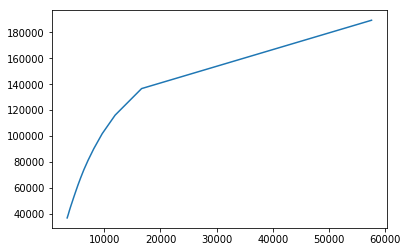

In [23]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_jokes, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [27]:
# Considering only words which have a frequency of atleast 15 and the corresponding sentences
final_vocabulary = dp.filter_words(word_freqs, 18)
print("Number of filtered words = ", len(final_vocabulary))
final_clean_jokes = dp.get_sentences_with_words(clean_jokes, final_vocabulary)
print("Number of sentences: ", len(final_clean_jokes))

Number of filtered words =  8930
Number of sentences:  96910


In [33]:
# Let's append sos and eos tokens to all sentences
clean_jokes_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_jokes]
clean_jokes_final = [' '.join(tokens) for tokens in clean_jokes_final]
vocabulary_final = dp.filter_words(dp.get_vocabulary(dp.tokenize(clean_jokes_final)), 0)
print("Final vocabulary size: ", len(vocabulary_final))
print("Number of sentences: ", len(clean_jokes_final))
print(clean_jokes_final[:2])
print(vocabulary_final[:10])

Final vocabulary size:  8922
Number of sentences:  96910
["sos did you hear about the new corduroy pillows ? they're making headlines everywhere ! eos", 'sos a toast to wives , girlfriends , and lovers . may they never meet . eos']
['sos', 'did', 'you', 'hear', 'about', 'the', 'new', 'corduroy', 'pillows', '?']


In [34]:
with open("./datasets/jokes.pickle","wb") as fop:
    pickle.dump(clean_jokes_final, fop)
    
with open("./datasets/jokes_vocabulary.pickle","wb") as fop:
    pickle.dump(vocabulary_final, fop)

In [35]:
print(clean_jokes_final[:20])

["sos did you hear about the new corduroy pillows ? they're making headlines everywhere ! eos", 'sos a toast to wives , girlfriends , and lovers . may they never meet . eos', 'sos if meat is murder threedots threedots then is cake battery ? eos', "sos i doubt vodka has all the answers but it's worth a shot . eos", "sos why was the mushroom invited to the party ? because he's a fungi . eos", "sos doctor doctor i'm a burglar ! have you taken anything for it ? eos", "sos god i'm so stupid i was looking all over for my car keys , turns out they were on my head the entire time . eos", 'sos what lives in a tree and is dangerous ? a crow with a machine gun . eos', "sos be nice to bacteria threedots they're the only culture some people have . eos", "sos my deaf girlfriend told me threedots my deaf girlfriend told me to fuck off . that's not a good sign eos", 'sos being gay is a choice threedots like being black , poor , or an amputee . no one really made you go to iraq eos', 'sos i like my cof